- This notebook performs a brief analysis of the color properties of the dataset. 
- Although the images will be converted to grayscale for the model, understanding the original color properties can help ensure data quality and consistency.


In [1]:
%load_ext autoreload
%autoreload 2

In [18]:
import os

import numpy as np
import matplotlib.pyplot as plt

from PIL import Image

from tqdm import tqdm

from utils.config import load_config

### Load data paths from config

In [6]:
config    = load_config()
train_dir = config['data_paths']['images_raw']
classes   = os.listdir(train_dir)

In [10]:
def compute_color_distribution(image_path):
    img = Image.open(image_path)
    img_array = np.array(img)
    
    red_channel = img_array[:, :, 0].ravel()
    green_channel = img_array[:, :, 1].ravel()
    blue_channel = img_array[:, :, 2].ravel()
    
    return red_channel, green_channel, blue_channel

### Compute and plot color distribution for a sample image

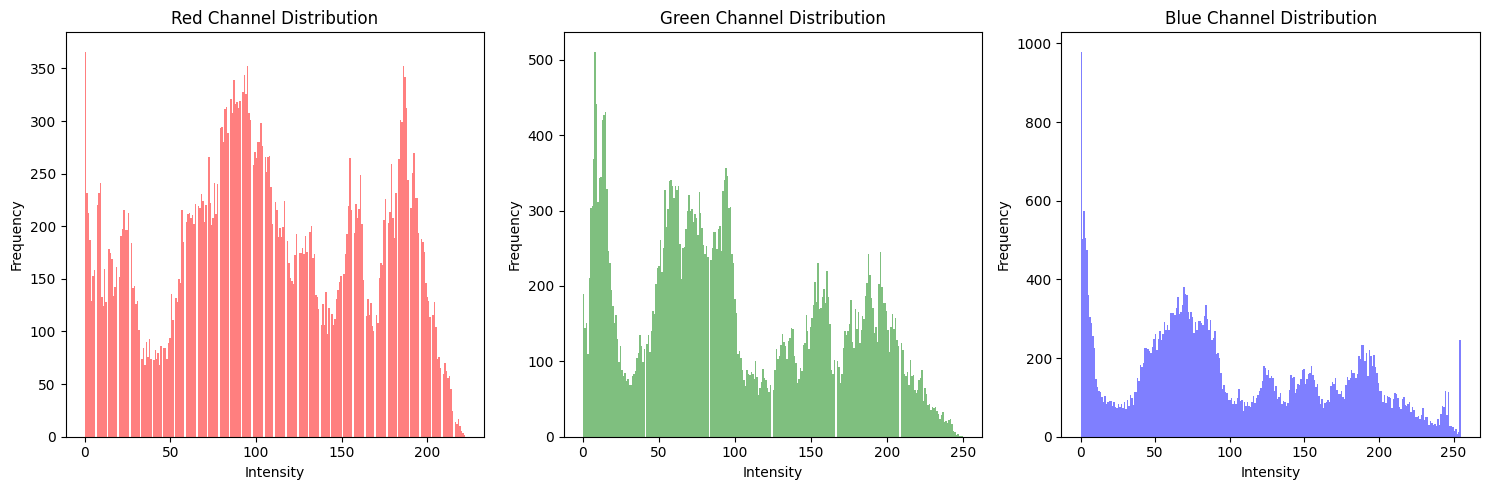

In [14]:
sample_image_path = os.path.join(train_dir, 'A', os.listdir(os.path.join(train_dir, 'A'))[1])
red_channel, green_channel, blue_channel = compute_color_distribution(sample_image_path)

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.hist(red_channel, bins=256, color='red', alpha=0.5)
plt.title('Red Channel Distribution')
plt.xlabel('Intensity')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
plt.hist(green_channel, bins=256, color='green', alpha=0.5)
plt.title('Green Channel Distribution')
plt.xlabel('Intensity')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
plt.hist(blue_channel, bins=256, color='blue', alpha=0.5)
plt.title('Blue Channel Distribution')
plt.xlabel('Intensity')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

### Grayscale Conversion Consistency Check of the sample image

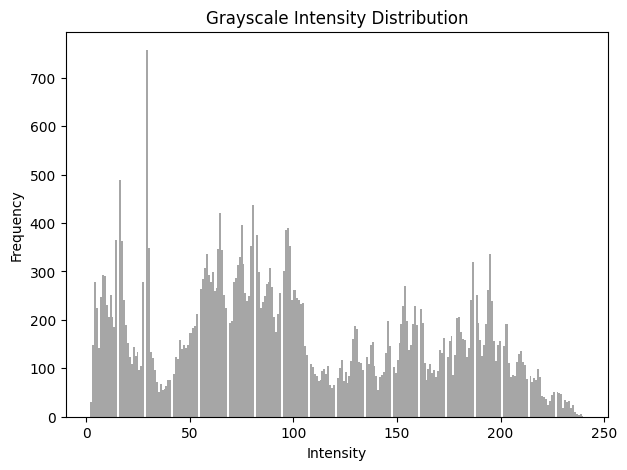

In [15]:

def compute_grayscale_intensity_distribution(image_path):
    img = Image.open(image_path).convert('L')
    img_array = np.array(img)
    
    return img_array.ravel()


grayscale_intensity = compute_grayscale_intensity_distribution(sample_image_path)

plt.figure(figsize=(7, 5))
plt.hist(grayscale_intensity, bins=256, color='gray', alpha=0.7)
plt.title('Grayscale Intensity Distribution')
plt.xlabel('Intensity')
plt.ylabel('Frequency')
plt.show()


### Statistical Summary of Color Channels of all images

In [20]:
def color_channel_stats(image_paths):
    red_stats = []
    green_stats = []
    blue_stats = []
    
    for image_path in tqdm(image_paths, total=len(image_paths), desc='Processing images'):
        red_channel, green_channel, blue_channel = compute_color_distribution(image_path)
        red_stats.append((np.mean(red_channel), np.std(red_channel)))
        green_stats.append((np.mean(green_channel), np.std(green_channel)))
        blue_stats.append((np.mean(blue_channel), np.std(blue_channel)))
    
    red_stats = np.array(red_stats)
    green_stats = np.array(green_stats)
    blue_stats = np.array(blue_stats)
    
    return red_stats, green_stats, blue_stats


all_images = []
for cls in tqdm(classes, total=len(classes), desc='Processing classes'):
    class_dir = os.path.join(train_dir, cls)
    all_images.extend([os.path.join(class_dir, img) for img in os.listdir(class_dir)])

red_stats, green_stats, blue_stats = color_channel_stats(all_images)

print("Red Channel - Mean: {:.2f}, Std: {:.2f}".format(np.mean(red_stats[:, 0]), np.mean(red_stats[:, 1])))
print("Green Channel - Mean: {:.2f}, Std: {:.2f}".format(np.mean(green_stats[:, 0]), np.mean(green_stats[:, 1])))
print("Blue Channel - Mean: {:.2f}, Std: {:.2f}".format(np.mean(blue_stats[:, 0]), np.mean(blue_stats[:, 1])))

Processing images: 100%|██████████| 87000/87000 [01:15<00:00, 1156.46it/s]

Red Channel - Mean: 132.32, Std: 51.97
Green Channel - Mean: 127.25, Std: 59.39
Blue Channel - Mean: 131.21, Std: 61.34


In [21]:
def grayscale_stats(image_paths):
    grayscale_stats = []
    
    for image_path in tqdm(image_paths, total=len(image_paths), desc='Processing images'):
        intensity = compute_grayscale_intensity_distribution(image_path)
        grayscale_stats.append((np.mean(intensity), np.std(intensity)))
    
    grayscale_stats = np.array(grayscale_stats)
    
    return grayscale_stats

grayscale_stats = grayscale_stats(all_images)

print("Grayscale - Mean: {:.2f}, Std: {:.2f}".format(np.mean(grayscale_stats[:, 0]), np.mean(grayscale_stats[:, 1])))

Processing images: 100%|██████████| 87000/87000 [01:00<00:00, 1446.70it/s]

Grayscale - Mean: 129.23, Std: 55.83


This notebook provided a brief analysis of the color properties of the dataset. 

* The color channel distributions ensure that there are no major anomalies, and the grayscale conversion check verifies that the conversion process maintains consistent intensity distributions.
* Statistical summaries of the color channels and grayscale intensities were calculated across the entire dataset, providing a quantitative measure of data quality.
* This preliminary check supports the overall data quality before proceeding with model training.